In [8]:
import json
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
def plot_validation_results(data):
    epochs = [int(d['epoch']) for d in data]
    losses = [d['loss'] for d in data]
    accs = [d['acc'] for d in data]

    sns.set(style="darkgrid")
    _, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

    # Plot the losses
    ax1.plot(epochs, losses, color='#B22222', marker='o')
    ax1.set_title('Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.set_xticks(epochs)
    ax1.tick_params(axis='both', which='major', labelsize=12)

    # Plot the accuracies
    ax2.plot(epochs, accs, color='#008080', marker='s')
    ax2.set_title('Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.set_xticks(epochs)
    ax2.tick_params(axis='both', which='major', labelsize=12)

    plt.tight_layout(pad=3)
    plt.show()


In [13]:
json_path = '/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/saved/ALBERT-War-Combined/lightning_logs/version_0/checkpoints/converted/model_validation.json'
with open(json_path, 'r') as f:
    data = json.load(f)

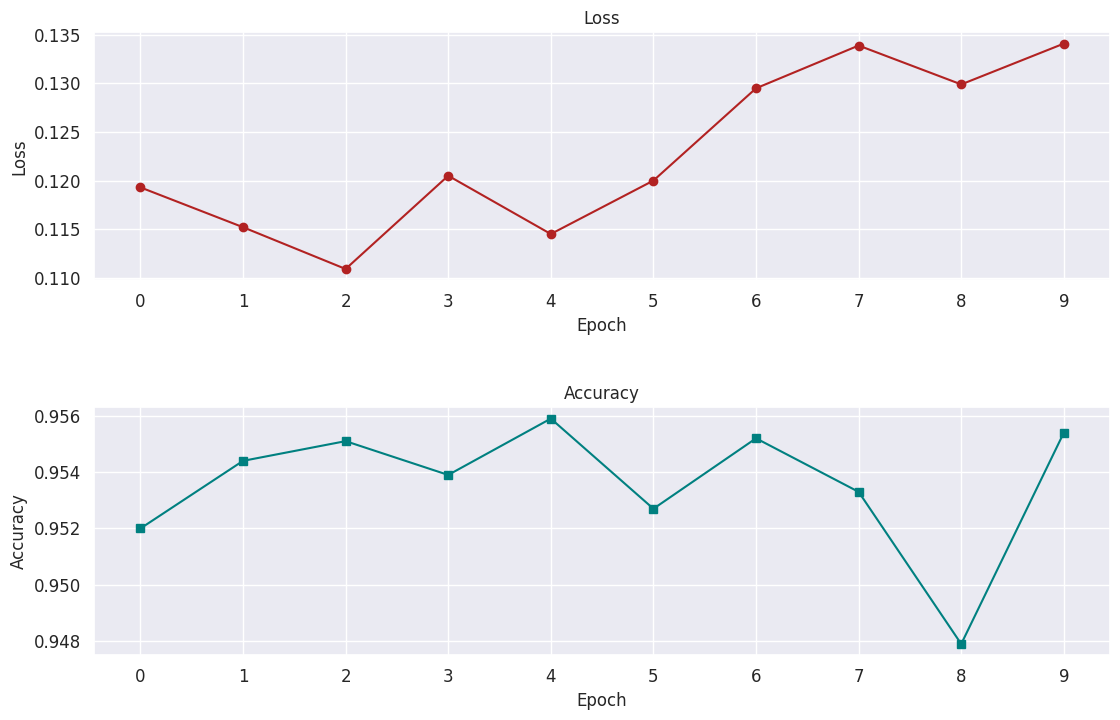

In [14]:
plot_validation_results(data)